# Logistic Regression(LR) in Python 
#### Isabel De La Cruz

## Understanding Logistic Regression

The Logistic Regression(LR) algorithm is for supervised learning-classification analysis. LR helps to find the best fit logistic function(sigmoid function) to descibe the relationship between $X$ and $Y$. LR is mainly used when the data in question has a binary output.

$Y$ is a binary variable. We label classes as either $1$ or $0$, with $1$ being the desired class prediction. When new observations come in, we can use its input variables and the logistic relationship to predict the probability of the new case belonging to class $y = 1$.

The aim for training the logistic regression model is to figure out the best weights for our linear model within the logistic regression. 

Gradient descent is a method of changing weights based on the loss function for each data point. The loss function tells us how good our model is at making predictions for a given set of parameters. 

## Applying LR on the Iris Data Set

In [56]:
# Importing neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [57]:
# Displaying the iris data set 
data = pd.read_csv('iris_data.csv')
data.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


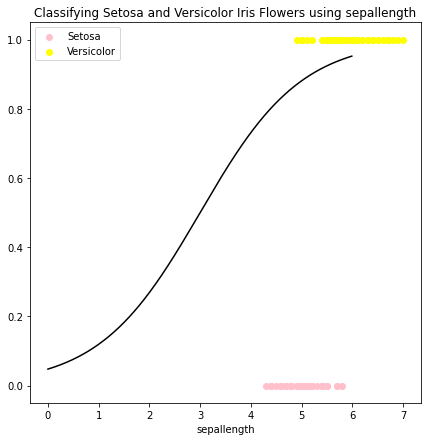

In [60]:
# Reading in the iris data set csv
# Reading in the iris data into a dataframe
iris = pd.read_csv('iris_data.csv')

variable = 'sepallength'
setosa = np.array(iris[iris["class"]=='Iris-setosa'][variable])
versicolor = np.array(iris[iris["class"]=='Iris-versicolor'][variable])

plt.figure(figsize=(7,7))
plt.scatter(setosa, np.array([0 for i in range(len(setosa))]), label="Setosa", color = "pink")
plt.scatter(versicolor, np.array([1 for i in range(len(versicolor))]), label="Versicolor", color = "yellow")
plt.xlabel(variable)
plt.title('Classifying Setosa and Versicolor Iris Flowers using ' + variable)
plt.legend()

w = np.array([1, -3])
x = np.arange(0, 6, .01)
y = 1/(1 + np.exp(-(w[0]*x) - w[1]))
plt.plot(x, y, color='black')



## Defining functions:

#### Sigmoid:

Takes in an input data point and calculates the sigmoid of the data point at that weight and outputs either 0 or 1
- INPUTS:
     - x_i, a scalar value of a given x
     - weight_vec, an array of length 2, the slope and the intercept
- OUTPUTS:
     - σ(slope*x_i + intercept), a value in the interval [0, 1]
 

In [61]:
def sigmoid(x_i, weight_vec):
    
    wtx = weight_vec[0]*x_i + weight_vec[1]
    probability = 1.0/(1.0 + np.exp(-wtx))
    return probability


#### Loss: 

Function to take in an input vector, an output array, and
    weight vector and returns the sum of squared residuals
- INPUTS:
     - input_vec, an array of length n that contains all the input data
     - output, an array of length n that contains all the outputs
     - weight_vec, an array with 2 elements, the slope and the intercept
- OUTPUTS:
     - total_loss, the sum of squared residuals, a scalar float value

In [67]:
def loss_function(input_vec, output, weight_vec):
   
    n = len(input_vec)
    total_loss = 0
    
    total_loss = 0
    for j in range(n):
        x_j = input_vec[j]
        y_j = output[j]
        total_loss += (y_j - sigmoid(x_j, weight_vec))**2
    return total_loss / n



#### Loss-Gradient:

Function to take in an input DataFrame, an output array, and weight vector and returns the sum of squared residuals
- INPUTS:
     - input_vec, an array with the input data of length n
     - output, an array of length n that is the outputs
     - weight_vec, an array of 2 weights where the first weight is the slope and the second weight is the intercept
- OUTPUTS:
     - The computed gradient of the Loss function at the given weights

In [68]:
def loss_gradient(input_vec, output, weight_vec):

    n = len(input_vec)
    sum_w1 = 0
    sum_w2 = 0
    for j in range(n):
        x_j = input_vec[j]
        y_j = output[j]
        σ = sigmoid(x_j, weight_vec)
        
        sum_w1 += (σ - y_j) * (σ**(-2)) * (np.exp(-(weight_vec[0]*x_j + weight_vec[1]))) * x_j
        sum_w2 += (σ - y_j) * (σ**(-2)) * (np.exp(-(weight_vec[0]*x_j + weight_vec[1]))) 
    sum_w1 *= 2/n
    sum_w2 *= (-2)/n
    return np.array([sum_w1, sum_w2])




#### Logistic Regression:

This is Least Squares Function that calculates an optimal slope and intercept for the given input_vec (x) and output (y)
- INPUTS:
     - input_vec, an array of length n that contains all the input data
     - output, an array of length n that contains all the outputs
     - weight_vec, an array with 2 elements, the slope and the intercept
     - loss_fxn, the loss function, a sum of squared residuals
     - loss_fxn_prime, the gradient of the loss function
     - α, the learning rate
- OUTPUTS:
     - w_hat, the final and optimal slope and intercept
  

In [69]:
def Logistic_Regression(input_vec, output, weight_vec, loss_fxn, loss_fxn_prime, α):
   
    num_iterations = 0
    error = float(1.0)
    w_k = weight_vec
    weights = []
    all_losses = []
    while (num_iterations <= 10000) & (error > .00001):
        w_k1 = w_k - α*loss_fxn_prime(input_vec, output, w_k)
        error = abs(loss_fxn(input_vec, output, w_k1) - loss_fxn(input_vec, output, w_k))
        weights.append(w_k1)
        all_losses.append(loss_function(input_vec, output, w_k1))
        num_iterations += 1
        w_k = w_k1
    return w_k1, weights, all_losses


### Plotting the Loss Function

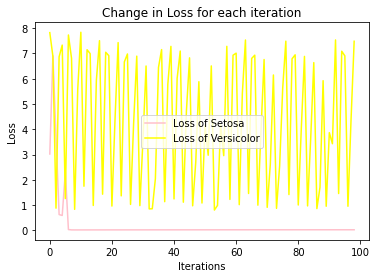

In [72]:
plt.plot(L1,
         color = "pink",
         label = "Loss of Setosa")

plt.plot(L2,
         color = "yellow",
         label = "Loss of Versicolor")



plt.title("Change in Loss for each iteration")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()